# Criteria in setting Borrower APR
## by Huong Huynh

## Investigation Overview

> The main focus of this project is to evaluate and understand the relationship of variables which have great impact on the borrower APR.

## Dataset Overview

> The dataset “Loan Data from Prosper” which contains all information about the loan itself and its borrower data. There are 81 attributes and 113,937 loan records. The variables are carefully analyzed in this dataset are the original loan amount, borrower's Prosper rating, loan term, borrower's stated monthly income.

In [40]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [41]:
# load in the dataset into a pandas dataframe
loans=pd.read_csv('C:\\Users\\clair\\Desktop\\Udacity\\Data visualization\\prosperLoanData.csv')
# data wrangling, remove loans with invalid Prosper Score
ValidLoan= loans.loc[loans['ProsperScore'] <11]
# data wrangling, remove loans with stated monthly income greater than 30k, which are outliers
loans_new1= ValidLoan[ValidLoan.StatedMonthlyIncome <30000]
# Subset the dataframe by selecting features of interest
num_stats=['StatedMonthlyIncome','LoanOriginalAmount','BorrowerAPR']
# Convert ProsperRating and Employment status into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)':['HR','E','D','C','B','A','AA'],
                    'EmploymentStatus':['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
                   }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_new1[var] = loans_new1[var].astype(ordered_var)
# Set base color    
base_color=sns.color_palette()[0]

## Distribution of BorrowerRate and BorrowerAPR

> - The Borrower APR rate seems little bit higher than the Borrower interest rate because of the associated fee with the loan. <br>
> - The highest peak is at 0.2 % for Borrower APR. <br>
> - There are only few loans have APR greater than 0.43.

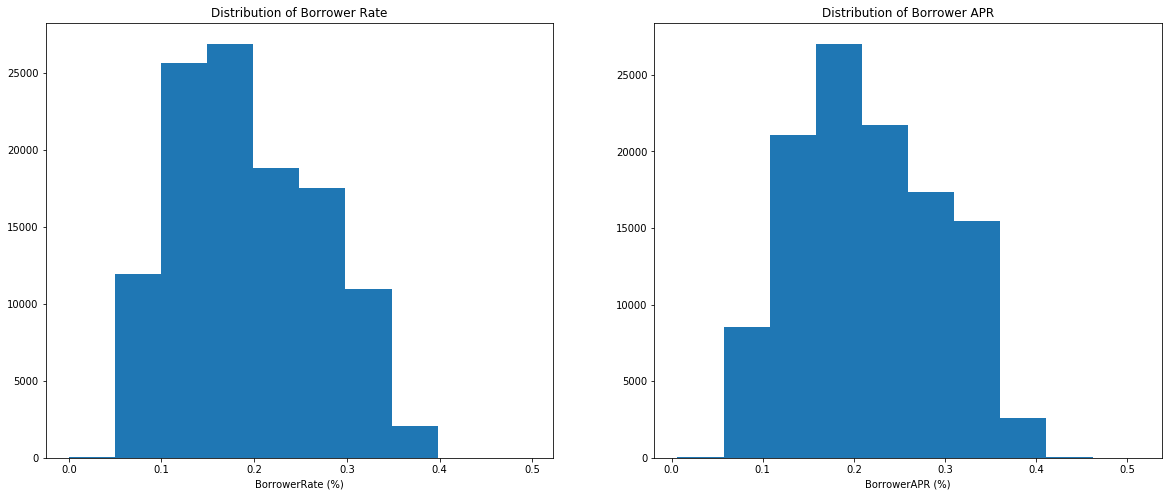

In [42]:
plt.figure(figsize = [20, 8]) 
plt.subplot(1, 2, 1)
plt.hist(data=loans,x='BorrowerRate')
plt.xlabel('BorrowerRate (%)')
plt.title('Distribution of Borrower Rate')
plt.subplot(1, 2, 2)
plt.hist(data=loans,x='BorrowerAPR')
plt.xlabel('BorrowerAPR (%)')
plt.title('Distribution of Borrower APR');

## Distribution of Original Loan Amount

> - There are high peak around 4k to 6k, 10k, 15k, 20k and 25k. 
> - Seventy five percent of the loans are smaller than 12k. 

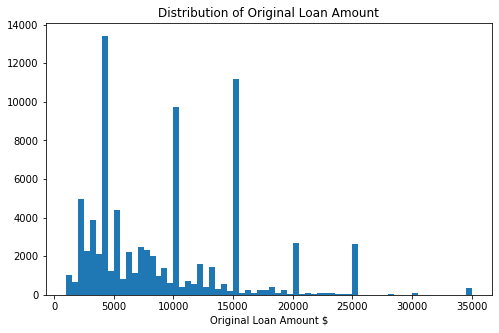

In [43]:
plt.figure(figsize=[8,5])
bins=np.arange(1000,loans_new1['LoanOriginalAmount'].max()+500,500)
plt.hist(data=loans_new1,x='LoanOriginalAmount',bins=bins)
plt.xlabel('Original Loan Amount $')
plt.title('Distribution of Original Loan Amount');

## Loan Original Amount and Stated Monthly Income in correlation with Borrower APR

> The correlation coefficients are not significant enough to illustrate any relationship between those numeric variables.

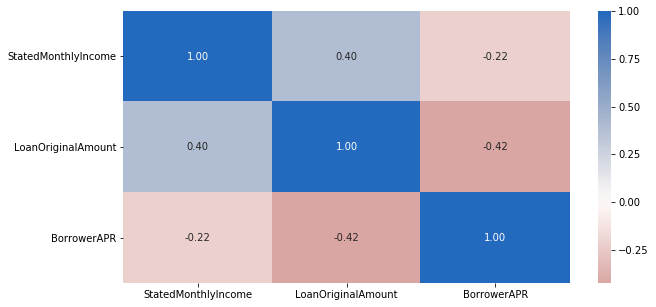

In [44]:
plt.figure(figsize = [10, 5])
ax=sns.heatmap(loans_new1[num_stats].corr(),annot=True,fmt='.2f',center = 0,cmap='vlag_r')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=360);

## Correlation between selected variables 

> - The higher 'Stated Monthly Income', the better ranking in 'Prosper Score' and ' Prosper Rating'. Part time employee, Retired and Unemployed show low income amount as expected. <br>
> - The range of'Loan Original Amount' is also proportionate with 'Prosper Score' and 'Prosper Rating'. <br>
> - The higher the score/ ranking of a borrower has, the bigger the loan get approved and the higher income they can generate.<br>
> - The rate of 'BorrowerAPR' is inversely proportional to 'Prosper Score' and 'Prosper Rating'. We can see that borrower APR rate is higher in employment group that don't have highly stated monthly income. The better score/ rating, the less risky of lending money.<br>
> - The Loan Original amount shows increased tendency with the term. 

<Figure size 720x720 with 0 Axes>

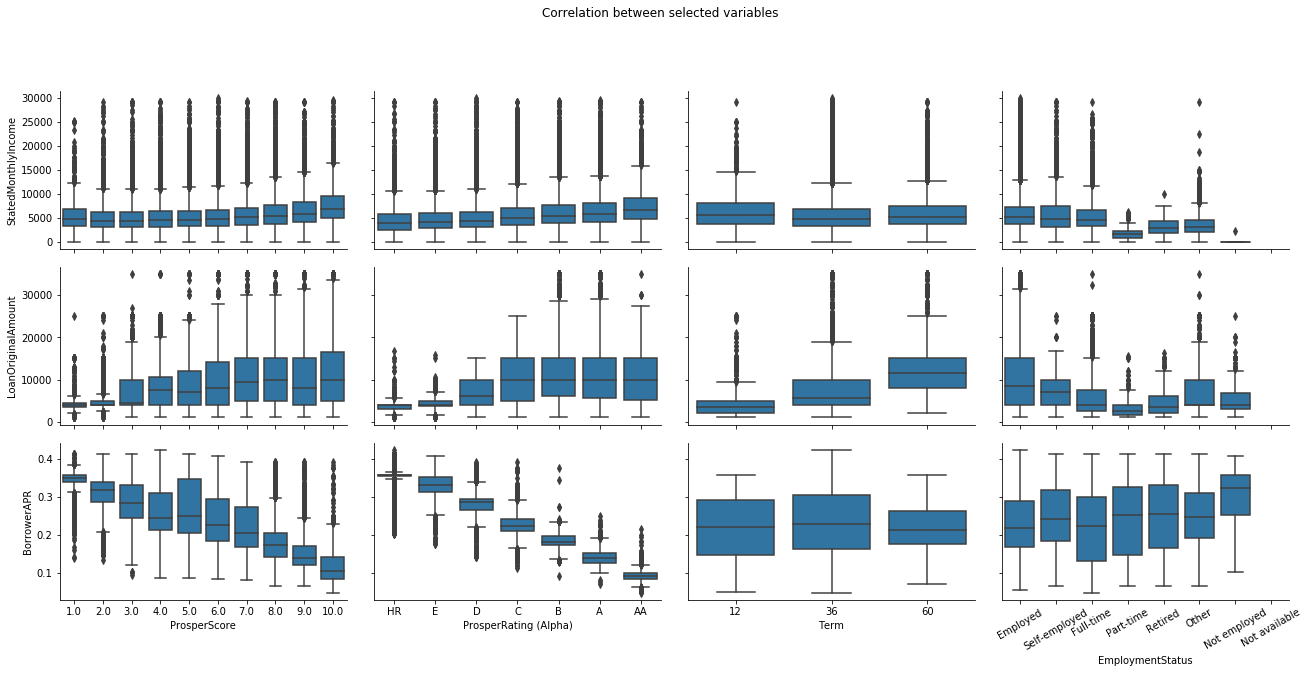

In [45]:
cat_stats=['ProsperScore','ProsperRating (Alpha)','Term','EmploymentStatus'];
def fixed_boxplot(x,y, **kwargs):
    sns.boxplot(x,y,color=base_color);
plt.figure(figsize = [10, 10]);
g=sns.PairGrid(data=loans_new1,y_vars= num_stats,x_vars= cat_stats,height=3,aspect=1.5);
g.map(fixed_boxplot);
plt.xticks(rotation=30);
plt.suptitle('Correlation between selected variables');
plt.subplots_adjust(top=0.85);

## Prosper Score Effect on Relationship between APR and Loan Original Amount

> - Borrowers with the better score tends to have bigger loan amount with lower APR rate. <br>
> - APR rate decreases with better score.<br>
> - The relationship between APR and Loan amount turns from negative to slightly positive when the rating at score 10. This could be the bar that the company sets to limit borrowers with high score/rating to borrow more with low interest rate. 


<Figure size 576x720 with 0 Axes>

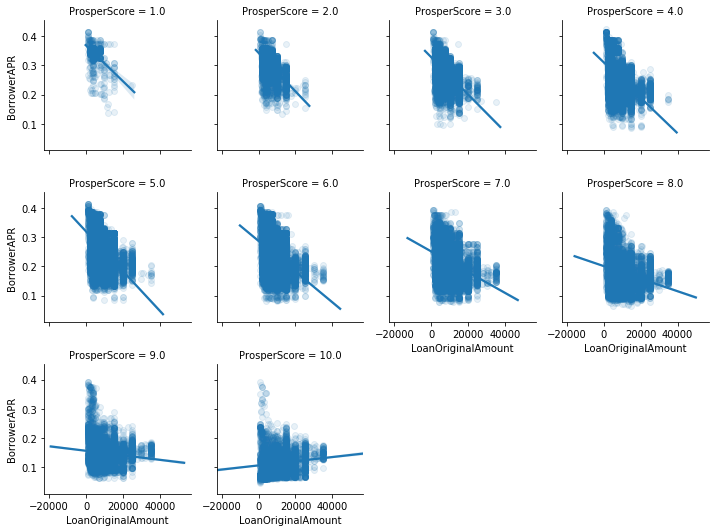

In [62]:
plt.figure(figsize=[8,10])
plt.suptitle('Prosper Score Effect on Relationship between APR and Loan Amount');
plt.subplots_adjust(top=0.85)
g = sns.FacetGrid(data = loans_new1, col ='ProsperScore', size = 2.5,
                margin_titles = True,col_wrap=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();


## Term Effect on Relationship between APR and Prosper Rating

> - Borrowers with the better rating has lower APR rate and they prefer longer term.<br>
> - HR group seems to have their loan in 36 months.<br>
> - The best group in rating AA has their lowest APR rate when their loan is in 12 months.<br>
> - Group B to AA has the best offer for APR rating if their borrowing term is 1 year in comparision with 3 years and 5 years. Their APR increases with the increment of borrowing term while lower ranking groups (HR to C) has APR decrease with the longer loan term.

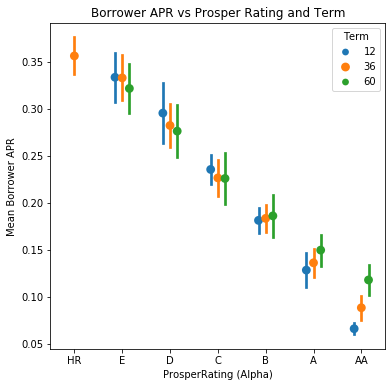

In [47]:
plt.figure(figsize=[6,6])
ax = sns.pointplot(data = loans_new1, y = 'BorrowerAPR', x = 'ProsperRating (Alpha)', hue = 'Term',
                  dodge = 0.3, linestyles = "",ci='sd')
plt.title('Borrower APR vs Prosper Rating and Term')
plt.ylabel('Mean Borrower APR');

In [51]:
!jupyter nbconvert slide_deck.ipynb --to slides --template output_toggle

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 553227 bytes to slide_deck.slides.html
